# MODUL PyTorch (Python 3.12)

# Vorhersage des Ödometerversuches implementiert
Ziel war die Implementierung eines neuronalen Netzwerks zur Modellierung des Ödometerversuchs. Dabei wurden gegebene Input-Parameter verarbeitet, um Output-Parameter vorherzusagen.

#### Das Problem ist wie folgt definiert:
$$
\begin{array}{rcl}
    \sigma_{t+1} & = & \sigma_{t}+\Delta\sigma \\ \\
    \Delta\sigma & = & E_s\cdot \Delta\epsilon \\ 
    E_s & = & \frac{1+e_0}{C_c} \cdot \sigma_t
\end{array}
\hspace{2cm}
\begin{array}{l}
    \textbf{Annahmen:} \\ \\
    \text{Startwert d. Iteration: } \sigma_t = 1,00 \\ 
    e_0 = 1,00 \\ 
    C_c = 0,005 \\
    \Delta\epsilon = 0,0005
\end{array}
$$

<br> 

Um das Model zu testen werden wir folgende vorberechnete Werte verwenden: `Input` { $\sigma_t$ }, `Output` { $E_s$ }.
<br>
### Variablendeklaration
- $\sigma_t$ = `sigma_t`
- $\Delta\epsilon$ = `delta_epsilon`
- $\sigma_{t+1}$ = `delta_sigma
- $E_s$ = `e_s`

# Generate random trainingsdata

In [1]:
from random import randint

# Define input and output parameters
input_str = "sigma_t"
output_str = "e_s"

# Defining problem parameters
delta_epsilon=0.0005
C_c = 0.005
e_0 = 1.0
amount_trainings_data = 100

# Data preparation for 
oedo_para = {
    'max_n': 1,
    'e_0': e_0,
    'C_c': C_c,
    'delta_epsilon' : delta_epsilon,
}

# Load problem and generate trainings data from 00_problem_settings_functions.ipynb

Available classes: `Oedometer` <br>
Returns `list_input` and `list_output` as type `list` <br>
Returns `tensor_input` and `tensor_output` as type `tensor`

In [2]:
%run 00_problem_settings_functions.ipynb

# Loads:
# Oedometer class

# Returns
# list_input: list
# list_output: list

# tensor_input: tensor
# tensor_output: tensor

# Show trainingsdata (List) as DataFrame
Type `list`: `list_input` and `list_output`

In [3]:
import pandas as pd
from pandas import DataFrame

pd.DataFrame([[input_str] + list_input, [output_str] + list_output])

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,sigma_t,46.0,26.0,45.0,32.0,22.0,2.0,15.0,23.0,45.0,...,32.0,12.0,1.0,11.0,44.0,26.0,19.0,2.0,21.0,28.0
1,e_s,18400.0,10400.0,18000.0,12800.0,8800.0,800.0,6000.0,9200.0,18000.0,...,12800.0,4800.0,400.0,4400.0,17600.0,10400.0,7600.0,800.0,8400.0,11200.0


# Show trainingsdata (Tensor) as DataFrame
Type `tensor`: `tensor_input` and `tensor_output`

In [4]:
tensor_input_df = pd.DataFrame(torch.cat((tensor_input, tensor_output), dim=1), columns = [input_str, output_str])
tensor_input_df

,sigma_t,e_s
0,46.0,18400.0
1,26.0,10400.0
2,45.0,18000.0
3,32.0,12800.0
4,22.0,8800.0
...,...,...
95,26.0,10400.0
96,19.0,7600.0
97,2.0,800.0
98,21.0,8400.0


# Define SimpleRegressor Model

In [5]:
import torch.nn as nn
import torch.optim as optim


class SimpleRegressor(nn.Module):
    def __init__(self):
        super(SimpleRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 2),
            nn.Linear(2, 1),
        )

    def forward(self, x):
        return self.model(x)

model = SimpleRegressor()

In [6]:
# import torch.nn as nn
# import torch.optim as optim


# class SimpleRegressor(nn.Module):
#     def __init__(self):
#         super(SimpleRegressor, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(1, 16),
#             nn.ReLU(),
#             nn.Linear(16, 16),
#             nn.ReLU(),
#             nn.Linear(16, 1)
#         )

#     def forward(self, x):
#         return self.model(x)

# model = SimpleRegressor()

# Training

In [7]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 15000
loss_history = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    pred = model(tensor_input)
    loss = loss_fn(pred, tensor_output)
    loss.backward()
    loss_history.append(loss.item())
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

Epoch 0: Loss = 128486048.000000
Epoch 100: Loss = 125310656.000000
Epoch 200: Loss = 116046224.000000
Epoch 300: Loss = 101191680.000000
Epoch 400: Loss = 82714488.000000
Epoch 500: Loss = 63004144.000000
Epoch 600: Loss = 44359768.000000
Epoch 700: Loss = 28576286.000000
Epoch 800: Loss = 16649375.000000
Epoch 900: Loss = 8676003.000000
Epoch 1000: Loss = 4012856.250000
Epoch 1100: Loss = 1649021.500000
Epoch 1200: Loss = 614351.375000
Epoch 1300: Loss = 222143.656250
Epoch 1400: Loss = 92315.273438
Epoch 1500: Loss = 54331.898438
Epoch 1600: Loss = 44296.476562
Epoch 1700: Loss = 41728.433594
Epoch 1800: Loss = 40914.925781
Epoch 1900: Loss = 40455.269531
Epoch 2000: Loss = 40046.121094
Epoch 2100: Loss = 39629.195312
Epoch 2200: Loss = 39194.214844
Epoch 2300: Loss = 38739.765625
Epoch 2400: Loss = 38265.066406
Epoch 2500: Loss = 37769.976562
Epoch 2600: Loss = 37254.472656
Epoch 2700: Loss = 36718.074219
Epoch 2800: Loss = 36160.824219
Epoch 2900: Loss = 35582.289062
Epoch 3000: L

# Loss function

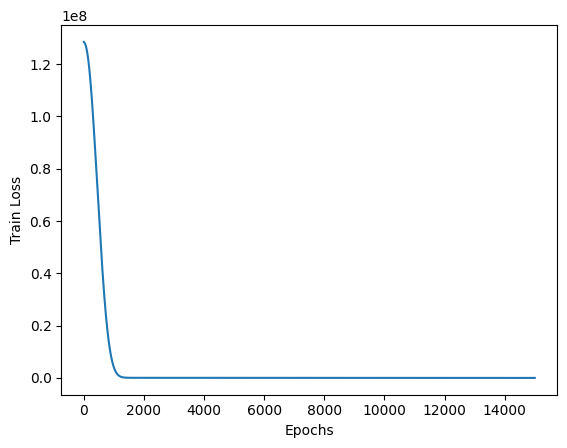

In [8]:
import matplotlib.pyplot as plt

plt.plot(loss_history, label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

In [9]:
pred_input = torch.tensor([1.0], dtype=torch.float).unsqueeze(-1) 

model.eval()
with torch.no_grad():
    pred = model(pred_input)

print(pred)

tensor([[400.0004]])


# Plot of stress–strain curve

<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\e'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\e'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_26437/196604954.py:33: SyntaxWarning: invalid escape sequence '\s'
  plt.scatter(sigma_true, e_s_pred, label='$E_{s,pred}$, $\sigma_{true}$').set_color("red")
/tmp/ipykernel_26437/196604954.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.scatter(sigma_pred, e_s_

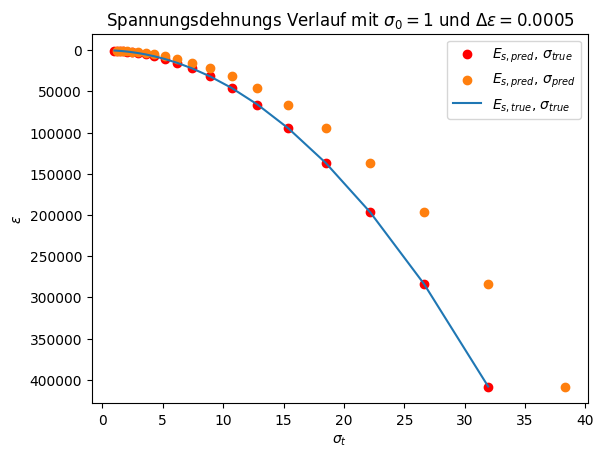

In [10]:
def plot_result(iterations=20, start_sigma=1, delta_epsilon=0.0005):
    oedo_para = {
    'max_n': iterations,
    'e_0': 1.0,
    'C_c': 0.005,
    'delta_epsilon' : delta_epsilon,
    'sigma_t' : start_sigma,
    }

    oedo = Oedometer(**oedo_para)
    sigma_true = oedo.sigma_t
    e_s_true = oedo.e_s
    
    # print(sigma_true)
    # print(e_s_true)
    model.eval()
    e_s_pred = []
    e_s_true_plot = []
    sigma_t = start_sigma
    sigma_pred = []
    pred_list = []
    with torch.no_grad():
        for i in range(iterations):
            sigma_true_tensor = torch.tensor(sigma_true[i], dtype=torch.float).unsqueeze(-1)
            pred = model(sigma_true_tensor)
            e_s_pred.append(pred * sigma_true[i])
            e_s_true_plot.append(e_s_true[i] * sigma_true[i])
            sigma_t = sigma_t + pred * delta_epsilon
            sigma_pred.append(sigma_t)
            pred_list.append(pred)
            
    # Plot der Losskurve
    plt.scatter(sigma_true, e_s_pred, label='$E_{s,pred}$, $\sigma_{true}$').set_color("red")
    plt.scatter(sigma_pred, e_s_pred, label='$E_{s,pred}$, $\sigma_{pred}$')
    plt.plot(sigma_true, e_s_true_plot, label='$E_{s,true}$, $\sigma_{true}$')

    plt.gca().invert_yaxis()
    plt.xlabel('$\sigma_t$')
    plt.ylabel('$\epsilon$')
    plt.title(f'Spannungsdehnungs Verlauf mit $\sigma_0={start_sigma}$ und $\Delta\epsilon=0.0005$')
    plt.legend()
    plt.show()

    return e_s_true, pred_list
e_s_true, e_s_pred = plot_result()

In [11]:
key_1 = "$E_{s,true}$"
key_2 = "$E_{s,pred}$"
key_3 = "$\Delta$"

dict_diff = {
    key_1 : [],
    key_2 : [],
    key_3 : [],
}
for i, x in zip(e_s_true, e_s_pred):
    dict_diff[key_1].append(i)
    dict_diff[key_2].append(x.item())
    dict_diff[key_3].append(x.item() - i)

df = pd.DataFrame(dict_diff)
df

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_26437/1978223764.py:3: SyntaxWarning: invalid escape sequence '\D'
  key_3 = "$\Delta$"


,"$E_{s,true}$","$E_{s,pred}$",$\Delta$
0,400.000000,400.000427,0.000427
1,480.000000,480.000458,0.000458
2,576.000000,576.000488,0.000488
3,691.200000,691.200439,0.000439
4,829.440000,829.440430,0.000430
5,995.328000,995.328430,0.000430
6,1194.393600,1194.394043,0.000443
7,1433.272320,1433.272705,0.000385
8,1719.926784,1719.927246,0.000462
9,2063.912141,2063.912598,0.000457
